# Figure 1, Neural Computations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lib.models import LIF, LRF

In [2]:
# Set figure aesthetics
sns.set_style("ticks")
sns.set_context("poster")
colors = qualitative_palette = sns.color_palette(["#009e73","#e59c00", "#55b2e8", "#efe440", "#d65c00", "#0071b2", "#cc78a6", "#000000"])
alpha = 1.
fs=20.5

## Run Simulation

In [5]:
# Hyperparameters
simulation_time = 1500
time = np.linspace(0, simulation_time-1, simulation_time*10)
dt = 0.1
synaptic_weights = [1.2, -1.2]

# Neuron Models
lif1 = LIF(0., -1., synaptic_weights, 20., 80., dt)
lif2 = LIF(0., -.2, synaptic_weights, 5., 55., dt)
lrf1 = LRF(0+0j, 0+1j, synaptic_weights, -8., 10. * 2 * np.pi, dt)
lrf2 = LRF(0+0j, 0.2-1.0j, synaptic_weights, -22., 20. * 2 * np.pi, dt)

# Input Spike Train
xs = np.zeros((np.round(simulation_time / dt, 1).astype(int), 2))
excitatory_spikes = [350, 400, 450, 1030, 1130, 1230]
inhibitory_spikes = [590, 690, 790]

for spike in excitatory_spikes:
    xs[int(spike // dt)] = [1., 0.]

for spike in inhibitory_spikes:
    xs[int(spike // dt)] = [0., 1.]


# Logs
lif1_spikes = []
lif1_vs = []
lif2_spikes = []
lif2_vs = []
lrf1_spikes = []
lrf1_vs = []
lrf2_spikes = []
lrf2_vs = []

# Simulate
for t in range(simulation_time*10):
    v, spiked = lif1(xs[t, :])
    lif1_spikes.append(spiked)
    lif1_vs.append(v)
    
    v, spiked = lif2(xs[t, :])
    lif2_spikes.append(spiked)
    lif2_vs.append(v)
    
    v, spiked = lrf1(xs[t, :])
    lrf1_spikes.append(spiked)
    lrf1_vs.append(v)
    
    v, spiked = lrf2(xs[t, :])
    lrf2_spikes.append(spiked)
    lrf2_vs.append(v)

## Plot

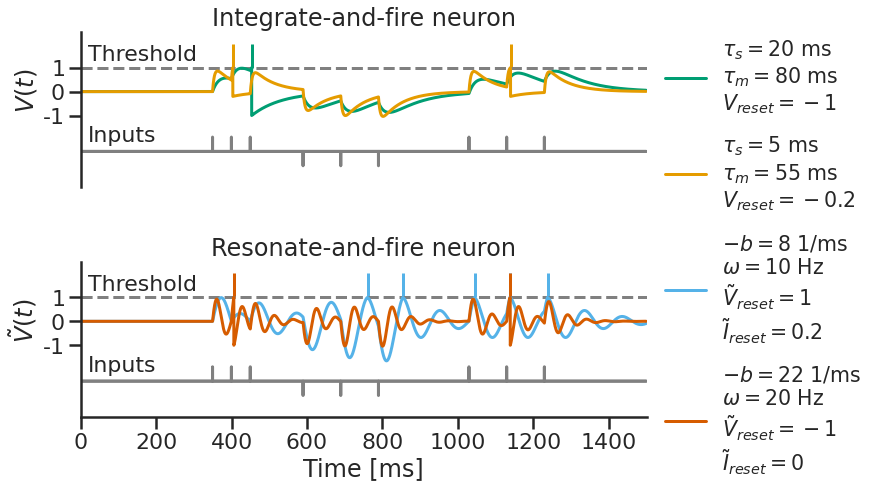

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(11, 7.3), sharex=False)
axs[0].plot(time, lif1_vs, alpha=alpha, color=colors[0], label="$\\tau_s = 20$ ms\n$\\tau_m = 80$ ms\n$V_{reset} = -1$", linewidth=3.)
axs[0].eventplot(np.where(np.asarray(lif1_spikes) == True)[0]/10, lineoffsets=1.5, linelength=1., alpha=alpha, color=colors[0])
axs[0].plot(time, lif2_vs, alpha=alpha, color=colors[1], label="$\\tau_s = 5$ ms\n$\\tau_m = 55$ ms\n$V_{reset} = -0.2$", linewidth=3.)
axs[0].eventplot(np.where(np.asarray(lif2_spikes) == True)[0]/10, lineoffsets=1.5, linelength=1., color=colors[1], alpha=alpha)
axs[0].set_yticks([-1, 0, 1])
axs[0].set_yticklabels([-1, 0, 1])
axs[0].set_xticks([])
axs[0].set_ylim([-4., 2.5])
axs[0].set_xlim([0., 1500.])
axs[0].hlines(1., 0., simulation_time, linestyle="--", color="grey")
axs[0].set_title("Integrate-and-fire neuron")
axs[0].set_ylabel("     $V(t)$")
axs[0].plot(time, np.asarray(xs)[:, 0]*0.6 - 2.5, color="grey")
axs[0].plot(time, np.asarray(xs)[:, 1]*-0.6 - 2.5, color="grey")
axs[0].text(20, 1.3, "Threshold", fontsize=22)
axs[0].text(20, -2.1, "Inputs", fontsize=22)
box = axs[0].get_position()
axs[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.4), frameon=False, fontsize=fs, labelspacing=0.9)
sns.despine(ax=axs[0], bottom=True)

axs[1].plot(time, np.imag(lrf1_vs), alpha=alpha, color=colors[2], label="$-b = 8$ 1/ms\n$\\omega = 10$ Hz\n$\\tilde{V}_{reset} = 1$\n$\\tilde{I}_{reset} = 0.2$", linewidth=3.)
axs[1].eventplot(np.where(np.asarray(lrf1_spikes) == True)[0]/10, lineoffsets=1.5, linelength=1., alpha=alpha, color=colors[2])
axs[1].plot(time, np.imag(lrf2_vs), alpha=alpha, color=colors[4], label="$-b = 22$ 1/ms\n$\\omega = 20$ Hz\n$\\tilde{V}_{reset} = -1$\n$\\tilde{I}_{reset} = 0$", linewidth=3.)
axs[1].eventplot(np.where(np.asarray(lrf2_spikes) == True)[0]/10, lineoffsets=1.5, linelength=1., color=colors[4], alpha=alpha)
axs[1].hlines(1., 0., simulation_time, linestyle="--", color="grey")
axs[1].set_yticks([-1, 0, 1])
axs[1].set_yticklabels([-1, 0, 1])
axs[1].set_ylim([-4., 2.5])
axs[1].set_xlim([0., 1500.])
axs[1].set_title("Resonate-and-fire neuron")
axs[1].set_ylabel("     $\\tilde{V}(t)$")
axs[1].plot(time, np.asarray(xs)[:, 0]*0.6 - 2.5, color="grey")
axs[1].plot(time, np.asarray(xs)[:, 1]*-0.6 - 2.5, color="grey")
axs[1].text(20, 1.3, "Threshold", fontsize=22)
axs[1].text(20, -2.1, "Inputs", fontsize=22)
axs[1].set_xlabel("Time [ms]")
box = axs[1].get_position()
axs[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
axs[1].legend(loc='center left', bbox_to_anchor=(1., 0.4), frameon=False, fontsize=fs, labelspacing=0.9)
sns.despine(ax=axs[1])

fig.tight_layout()

fig.savefig("figure-1-a.svg", pad_inches=0.)